In this Notebook, We have 4 data instances that show the number of votes in a given district and year. we create 4 random variable using the normal distribution that each shows a instance. by using the yerr and capsize parameter of barcharts, we plotted a 95% confidence interval on top of each plot. And by using the Normalize class, we mapped a color intensity to each color to allow users to click on the y axis, and also change the bar chart colors.

The bar colors change appropriately with respect to what value the user has selected. if a value selected by a user is above the estimate of the population parameter, the bar plot might be colored red, under the estimate of the population parameter, the bar plot might be colored blue, and if a value selected by a user contains this value, the bar plot might be colored white.

In [1]:
try:
    y = int(input("Please enter an integer number: "))
except ValueError:
    print('Please enter just an integer number')    
    
while y <= 0:
    y = int(input("Please enter an integer number: "))

Please enter an integer number: 37000


<IPython.core.display.Javascript object>


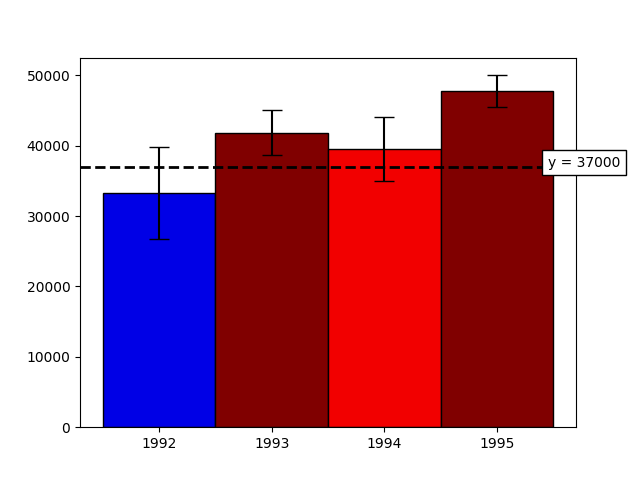

In [2]:
import pandas as pd
import numpy as np
get_ipython().magic('matplotlib notebook') # same as %matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df_mean = df.mean(axis=1) # the mean() function is applied on the values of each instance.

# df.shape[1] gives the number of columns = 3650.
# df.std only does numerator calculation of standard deviation formula.
df_std = df.std(axis=1)/np.sqrt(df.shape[1])

# we use 1.96 in the central limit theorem and hypothesis testing to estimate the Confidence Interval for a population
# (the range of values that contain the true population mean with a certain level of confidence).
# by using Normalize, we can create a data range which has the min value of vmin and the max value of vmax. It can be
# used to normalize data values into the range [0, 1].
norm = Normalize(vmin=-1.96, vmax=1.96) 

# we can pass in 'seismic', 'coolwarm', and etc to get_cmap function as a colour palette.
cmap = get_cmap('seismic')

df_colors = pd.DataFrame([])
# we normalize the values of df_mean and df_std by using a norm object.
df_colors['intensity'] = norm((df_mean-y)/df_std) # Usual normalising formula.
df_colors['color'] = [cmap(x) for x in df_colors['intensity']] # Assign colour depending on norm value.

# after we normalised df_std for assigning colour intensity earlier, we should calculate Confidence Intervals using 
# the standard error of the mean (SEM) and the number 1.96 to find out how the mean of samples is precise.
# The capsize parameter sets the whiskers plot for the error on the barplot.
CI = df_std*1.96 # Confidence Interval
bar_plot = plt.bar(df.index, df_mean, yerr=CI, color=df_colors['color'],
                   capsize=7, width=1, edgecolor='k');

# axhline -> Horizontal line.
hoz_line = plt.axhline(y=y, color='k', linewidth=2, linestyle='--');

# Text box for chosen value. 1995.5 gives the x axis location for positioning the box.
# ec is the colour of the box border. fc is the colour of the box filling.
y_text = plt.text(x=1995.45, y=y, s='y = %d' %y, bbox=dict(fc='white',ec='k'));

# Add xticks
plt.xticks(df.index, ('1992', '1993', '1994', '1995'));

# Add interactivity
def onclick(event):
    for i in range(4):
        shade = cmap(norm((df_mean.values[i]-event.ydata)/df_std.values[i])) # determine the color intensity of each bar plot
        bar_plot[i].set_color(shade) # set a new color for each bar plot
    hoz_line.set_ydata(event.ydata) # set a new y value for a horizontal line
    y_text.set_text('y = %d' %event.ydata); # set a new value for the bbox text
    y_text.set_position((1995.45, event.ydata)); # set a new value for the bbox x and y
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick);

The wider the confidence interval, the less precise the estimate of the population parameter. 

In [3]:
random_variable_means = [32000, 43000, 43500, 48000]
for i in range(4):
    print("the differece between the random variable mean {} \
and the estimate of the population parameter {:.3f} is {:.3f}".format(random_variable_means[i],
                                                                       df_mean.iloc[i],
                                                                       abs(random_variable_means[i] - df_mean.iloc[i])))


the differece between the random variable mean 32000 and the estimate of the population parameter 33312.107 is 1312.107
the differece between the random variable mean 43000 and the estimate of the population parameter 41861.860 is 1138.140
the differece between the random variable mean 43500 and the estimate of the population parameter 39493.305 is 4006.695
the differece between the random variable mean 48000 and the estimate of the population parameter 47743.551 is 256.449
